PSNR: 12.795423273333705 dB
Quality: 8.970 JOD


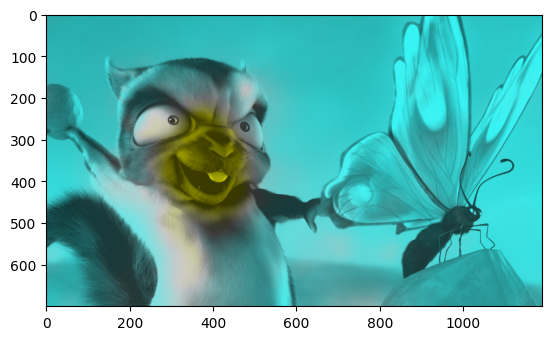

In [3]:
import cv2
import numpy as np
import pycvvdp
import utils
import matplotlib.pyplot as plt
import torch

def calculate_psnr(image1, image2):
    """
    Calculate the PSNR between two colored images.
    
    Parameters:
        image1: The first image (numpy array).
        image2: The second image (numpy array).
    
    Returns:
        psnr: The PSNR value in decibels (dB).
    """
    # Ensure the images have the same dimensions
    if image1.shape != image2.shape:
        raise ValueError("Input images must have the same dimensions.")
    
    # Convert images to float32 for computation
    image1 = image1.astype(np.float32)
    image2 = image2.astype(np.float32)
    
    # Calculate Mean Squared Error (MSE)
    mse = np.mean((image1 - image2) ** 2)
    
    # If MSE is zero, PSNR is infinite
    if mse == 0:
        return float('inf')
    
    # Maximum possible pixel value (assuming 8-bit images)
    max_pixel = 255.0
    
    # Calculate PSNR
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Load two images for comparison
image1_path = "/home/billzhang/repo/boyu/formal2/time-multiplexed-neural-holography/results1/_SGD_rgb_ASM_5000_recon_1.0_None_0.0_random_tm_1_cvvdp_loss/2_recon.png"
image2_path = "/home/billzhang/repo/boyu/formal2/time-multiplexed-neural-holography/results1/_SGD_rgb_ASM_5000_recon_1.0_None_0.0_random_tm_1_cvvdp_loss/2_target.png"
image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

# Calculate PSNR
psnr_value = calculate_psnr(image1, image2)
print(f"PSNR: {psnr_value} dB")

I_ref = pycvvdp.load_image_as_array(image1_path)
I_test = pycvvdp.load_image_as_array(image2_path)
I_ref = (I_ref/255.0).astype(np.float32)
I_test = (I_test/255.0).astype(np.float32)

# I_ref = utils.srgb_gamma2lin(I_ref).astype(np.float32)
# I_test = utils.srgb_gamma2lin(I_test).astype(np.float32)
# L_peak = 10
# source_type = 'LED'
# disp_photo = pycvvdp.vvdp_display_photo_eotf(L_peak, source_colorspace=source_type)
# metric = pycvvdp.cvvdp(display_photometry=disp_photo, heatmap='supra-threshold')
# Q_JOD_noise, stats_noise = metric.predict( I_test*L_peak, I_ref*L_peak, dim_order="HWC" )
metric = pycvvdp.cvvdp(display_name='my_display', heatmap='supra-threshold')
Q_JOD_noise, stats_noise = metric.predict( I_test, I_ref, dim_order="HWC" )
cvvdp_string = f'Quality: {Q_JOD_noise:.3f} JOD'
print( cvvdp_string )

plt.imshow( stats_noise['heatmap'][0,:,0,:,:].permute([1,2,0]).to(torch.float32).numpy() )
plt.show()